In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [2]:
df_abilities = pd.read_excel('../Data/ONET/Abilities.xlsx')
print('Abilities')
print(df_abilities.head())

df_skills = pd.read_excel('../Data/ONET/Skills.xlsx')
print('Skills')
print(df_skills.head())

# df_knowledge = pd.read_excel('../Data/ONET/Knowledge.xlsx')
# print('Knowledge')
# print(df_knowledge.head())

Abilities
  O*NET-SOC Code             Title Element ID           Element Name Scale ID  \
0     11-1011.00  Chief Executives  1.A.1.a.1     Oral Comprehension       IM   
1     11-1011.00  Chief Executives  1.A.1.a.1     Oral Comprehension       LV   
2     11-1011.00  Chief Executives  1.A.1.a.2  Written Comprehension       IM   
3     11-1011.00  Chief Executives  1.A.1.a.2  Written Comprehension       LV   
4     11-1011.00  Chief Executives  1.A.1.a.3        Oral Expression       IM   

   Scale Name  Data Value  N  Standard Error  Lower CI Bound  Upper CI Bound  \
0  Importance        4.62  8          0.1830          4.2664          4.9836   
1       Level        4.88  8          0.1250          4.6300          5.1200   
2  Importance        4.25  8          0.1637          3.9292          4.5708   
3       Level        4.88  8          0.1250          4.6300          5.1200   
4  Importance        4.50  8          0.1890          4.1296          4.8704   

  Recommend Suppress N

In [3]:
scaler = StandardScaler()
pca = PCA()

In [4]:
print("Unique job titles abilities: ", df_abilities['Title'].nunique())
print("Unique job titles skills: ", df_skills['Title'].nunique())
ids_abilities = set(df_abilities['Title'].unique())
ids_skills = set(df_skills['Title'].unique())

print("Same job titles in both datasets: ", ids_abilities == ids_skills)

Unique job titles abilities:  894
Unique job titles skills:  894
Same job titles in both datasets:  True


In [5]:
df_abilities=df_abilities.loc[
    df_abilities['Scale ID']=='LV',
    ['O*NET-SOC Code', "Title",'Element Name', 'Data Value']]

df_abilities.head()

,O*NET-SOC Code,Title,Element Name,Data Value
1,11-1011.00,Chief Executives,Oral Comprehension,4.88
3,11-1011.00,Chief Executives,Written Comprehension,4.88
5,11-1011.00,Chief Executives,Oral Expression,4.88
7,11-1011.00,Chief Executives,Written Expression,4.75
9,11-1011.00,Chief Executives,Fluency of Ideas,4.62


In [6]:
skills=df_skills.loc[
    df_skills['Scale ID']=='LV',
    ['O*NET-SOC Code',"Title", 'Element Name', 'Data Value']]

skills.head()


,O*NET-SOC Code,Title,Element Name,Data Value
1,11-1011.00,Chief Executives,Reading Comprehension,4.62
3,11-1011.00,Chief Executives,Active Listening,4.75
5,11-1011.00,Chief Executives,Writing,4.38
7,11-1011.00,Chief Executives,Speaking,4.75
9,11-1011.00,Chief Executives,Mathematics,3.50


In [7]:
# 1. Add prefixes to the 'Element Name' column
# We use string concatenation to update the values
df_abilities['Element Name'] = "A: " + df_abilities['Element Name']
df_skills['Element Name']    = "S: " + df_skills['Element Name']

In [8]:
# 1. Pivot Skills
skills_wide = df_skills.pivot_table(
    index='O*NET-SOC Code', 
    columns='Element Name', 
    values='Data Value'
)

# 2. Pivot Abilities
abilities_wide = df_abilities.pivot_table(
    index=['O*NET-SOC Code', 'Title'], 
    columns='Element Name', 
    values='Data Value'
)

In [9]:

full_df = abilities_wide.join(skills_wide, on='O*NET-SOC Code')

# Fill empty values with 0 (just in case a job is missing a specific skill rating)
full_df = full_df.fillna(0)

# Check the result
print("Shape:", full_df.shape) 
full_df.head()

Shape: (894, 87)


,Element Name,A: Arm-Hand Steadiness,A: Auditory Attention,A: Category Flexibility,A: Control Precision,A: Deductive Reasoning,A: Depth Perception,A: Dynamic Flexibility,A: Dynamic Strength,A: Explosive Strength,A: Extent Flexibility,...,S: Science,S: Service Orientation,S: Social Perceptiveness,S: Speaking,S: Systems Analysis,S: Systems Evaluation,S: Technology Design,S: Time Management,S: Troubleshooting,S: Writing
O*NET-SOC Code,Title,,,,,,,,,,,,,,,,,,,,,
11-1011.00,Chief Executives,0.50,2.00,4.00,0.75,4.75,1.38,0.0,0.25,0.00,0.00,...,1.185,3.250,4.185,4.50,4.62,4.625,1.315,4.375,1.000,4.250
11-1011.03,Chief Sustainability Officers,0.00,1.75,3.50,0.50,4.75,1.75,0.0,0.00,0.00,0.00,...,2.000,3.250,3.880,4.06,3.94,3.940,1.500,3.630,0.500,4.185
11-1021.00,General and Operations Managers,0.88,2.00,3.25,0.12,4.12,1.62,0.0,0.12,0.38,0.25,...,1.060,3.185,3.875,4.06,3.12,3.185,1.060,3.750,1.375,3.690
11-2011.00,Advertising and Promotions Managers,0.50,1.25,3.88,0.12,4.50,1.00,0.0,0.00,0.00,0.00,...,1.120,3.185,4.000,4.06,3.12,3.435,1.250,3.690,0.500,3.815
11-2021.00,Marketing Managers,0.12,1.62,3.62,0.00,4.38,0.75,0.0,0.25,0.00,0.00,...,1.625,3.185,3.940,4.00,3.50,3.625,1.315,3.625,0.500,3.565


In [10]:
X = full_df.values

In [11]:
X_scaled = scaler.fit_transform(X)


# The original data (0 to 7 scale)
print("Original First Value:", X[0][0]) 

# The scaled data (Z-score, usually between -2 and +2)
print("Scaled First Value:", X_scaled[0][0])

# Verify Mean is ~0 and Std is ~1
print("New Mean:", X_scaled.mean().round(2))
print("New Std:", X_scaled.std().round(2))

Original First Value: 0.5
Scaled First Value: -1.4187069226581608
New Mean: 0.0
New Std: 1.0


Variance explained by PC1: 47.49%
Variance explained by PC2: 18.95%
Variance explained by PC3: 6.16%
Total variance with 2 components: 66.44%
Total variance with 3 components: 72.60%


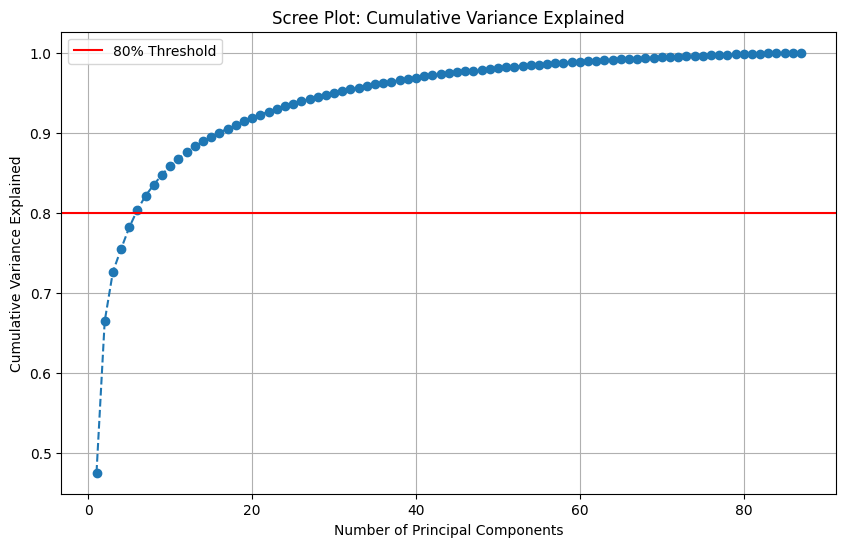

In [12]:
pca.fit(X_scaled)

evr = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(evr)

print(f"Variance explained by PC1: {evr[0]:.2%}")
print(f"Variance explained by PC2: {evr[1]:.2%}")
print(f"Variance explained by PC3: {evr[2]:.2%}")
print(f"Total variance with 2 components: {cumulative_variance[1]:.2%}")
print(f"Total variance with 3 components: {cumulative_variance[2]:.2%}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(evr) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='-', label='80% Threshold')  # Threshold line
plt.title('Scree Plot: Cumulative Variance Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
feature_names = full_df.columns

loadings = pd.DataFrame(
    pca.components_, 
    columns=feature_names,
    index=[f'PC{i+1}' for i in range(len(pca.components_))]
)

def interpret_component(pc_name):
    print(f"*** {pc_name} Interpretation ***")
    
    # Sort values to find the strongest POSITIVE contributors
    top_pos = loadings.loc[pc_name].nlargest(5)
    print("Top Positive (High Values):")
    print(top_pos)
    print("-" * 20)
    
    # Sort values to find the strongest NEGATIVE contributors
    top_neg = loadings.loc[pc_name].nsmallest(5)
    print("Top Negative (Low Values):")
    print(top_neg)
    print("\n")

interpret_component('PC1')
interpret_component('PC2')
interpret_component('PC3')

*** PC1 Interpretation ***
Top Positive (High Values):
Element Name
S: Reading Comprehension    0.143484
A: Written Expression       0.143380
S: Writing                  0.143126
S: Speaking                 0.142439
S: Active Listening         0.141503
Name: PC1, dtype: float64
--------------------
Top Negative (Low Values):
Element Name
A: Extent Flexibility       -0.130770
A: Static Strength          -0.129577
A: Dynamic Strength         -0.128630
A: Multilimb Coordination   -0.127266
A: Trunk Strength           -0.124234
Name: PC1, dtype: float64


*** PC2 Interpretation ***
Top Positive (High Values):
Element Name
A: Perceptual Speed            0.190247
A: Visualization               0.182574
A: Flexibility of Closure      0.175960
S: Operations Monitoring       0.175934
S: Quality Control Analysis    0.174934
Name: PC2, dtype: float64
--------------------
Top Negative (Low Values):
Element Name
S: Service Orientation     -0.003289
A: Speech Clarity           0.008012
A: Speech Rec

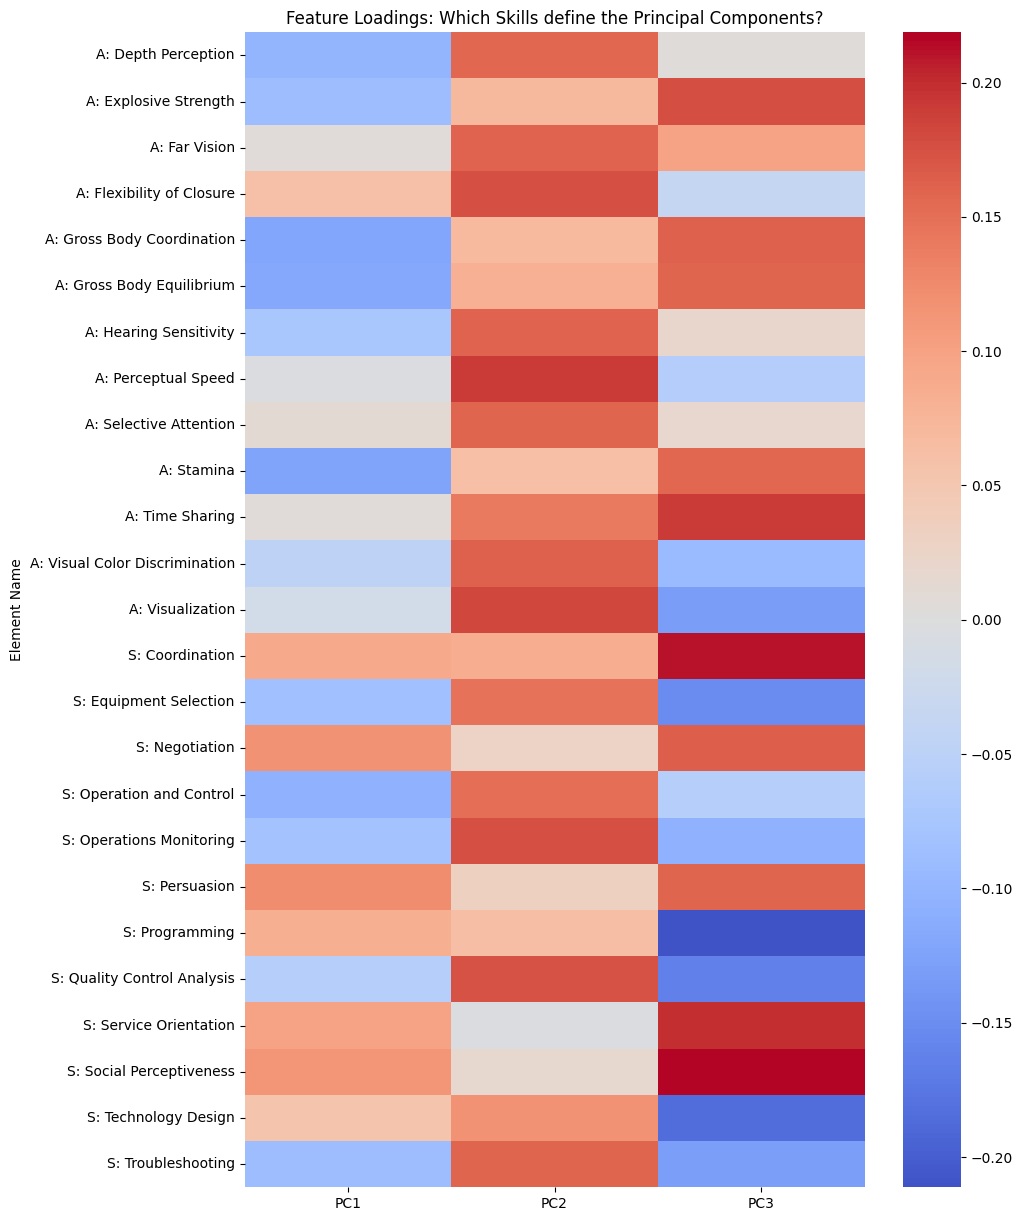

In [16]:
# Plot the top 3 Components and their relationship to a subset of skills
# We transpose (.T) so skills are on the side, PCs are on the bottom
plt.figure(figsize=(10, 15))

# We only pick the top 3 PCs to show in the chart
subset = loadings.iloc[:3].T 

# We filter to show only skills that have at least ONE strong connection (>0.15 or <-0.15)
# This removes "noise" skills that don't matter much
filtered_subset = subset[(subset.abs() > 0.15).any(axis=1)]

sns.heatmap(filtered_subset, cmap='coolwarm', center=0, annot=False)
plt.title("Feature Loadings: Which Skills define the Principal Components?")
plt.show()